# Linear Regression

Linear regression is a widely used statistical technique for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and aims to find the best-fit line that minimizes the difference between the predicted and actual values. The goal of linear regression is to make predictions or understand the impact of independent variables on the dependent variable.

In [161]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
# Load the dataset
df = pd.read_csv('../../assets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.10,39343.000
1,1.11,39669.762
2,1.12,39996.524
3,1.13,40323.286
4,1.14,40650.048


In [151]:
# Data Analysis
df.describe()

,YearsExperience,Salary
count,1002.000000,1002.000000
mean,5.795609,81158.770958
std,2.716706,26559.840782
min,1.100000,37731.000000
25%,3.442500,58257.311000
50%,5.795000,82751.085500
75%,8.147500,106518.536500
max,10.500000,122391.000000


Here, we can see Salary ranges from `37731` to `122391` and a median of `82751`.
</br></br>
A distplot or distribution plot shows the variation in the data distribution.
It represents the data by combining a line with a histogram.

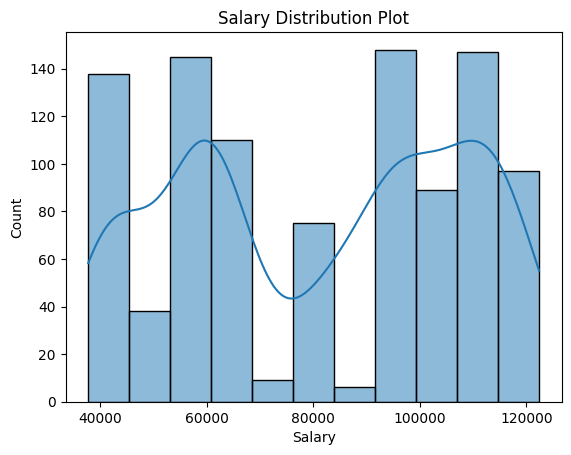

In [152]:
# Plot the data distribution
plt.title('Salary Distribution Plot')
sns.histplot(df['Salary'], kde=True) 
plt.show()

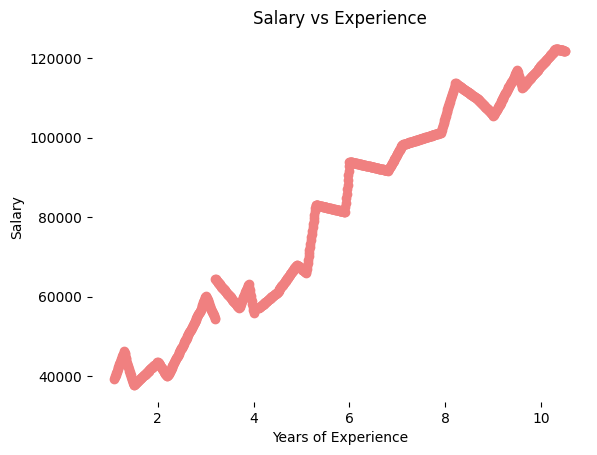

In [153]:
# Relationship between Salary and Experience
plt.scatter(df['YearsExperience'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

## Simple Linear Regression

In simple linear regression, we consider a single independent variable and a single dependent variable. The relationship between the variables can be represented by the equation:

$y = mx + c$

Where:

- `y` is the dependent variable
- `x` is the independent variable
- `c` is the y-intercept (the value of `y` when `x` is 0)
- `m` is the slope (the change in `y` for a unit change in `x`)

In higher dimension this equation becomes:

$y = wx + b$

The goal is to estimate the values of $w$ and $b$ that best fit the data.

In [154]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [155]:
# Splitting variables
X = df.iloc[:, :1]  # independent
y = df.iloc[:, 1:]  # dependent

## Geometric and Mathematical Intuition

<img src = "https://miro.medium.com/v2/resize:fit:450/1*bACFHSM81VJVr900rLoUog.png">
<img src = "https://miro.medium.com/v2/resize:fit:450/1*7miWhsUBOAYI8VmXuAp32g.png">

Geometrically, linear regression aims to find the line that minimizes the sum of squared distances between the observed data points and the predicted values on the line. The line is chosen such that the vertical distances between the points and the line are minimized.

### Linear Regression

$error for x_1 = y_1 - ŷ_1$

$error for x_2 = y_2 - ŷ_2$

$error for x_3 = y_3 - ŷ_3 = 0 \quad$ *$∵ [y_3 = ŷ_3]$*

Mathematically, the goal is to minimize the sum of squared residuals (also known as the residual sum of squares or RSS) given by:

$RSS = Σ(y - ŷ)^2$

Where:

- `y` is the observed value of the dependent variable
- `ŷ` is the predicted value of the dependent variable based on the regression line

The best-fit line is obtained by minimizing RSS, which can be achieved through various optimization techniques.

In [165]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 42)

len(X_train), len(X_test)

(901, 101)

In [166]:
# Linear Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Ordinary Least Squares (OLS) Estimation

The most common method to estimate the coefficients (`b` and `w`) in linear regression is the Ordinary Least Squares (OLS) estimation. It aims to minimize the sum of squared residuals by finding the values of `b` and `w` that minimize the following equation:

$\frac{∂RSS}{∂b0} = -2Σ(y - b0 - b1 * x) = 0$

$\frac{∂RSS}{∂b1} = -2Σx(y - b0 - b1 * x) = 0$

Solving these equations simultaneously will yield the estimated coefficients b0 and b1:

$w = \frac{Σ(x - x̄)(y - ȳ)}{Σ(x - x̄)^2}$

$b = ȳ - w * x̄$

Where:

- `x̄` is the mean of the independent variable `x`
- `ȳ` is the mean of the dependent variable `y`

These formulas can be computed efficiently, providing the best-fit line.

In [167]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

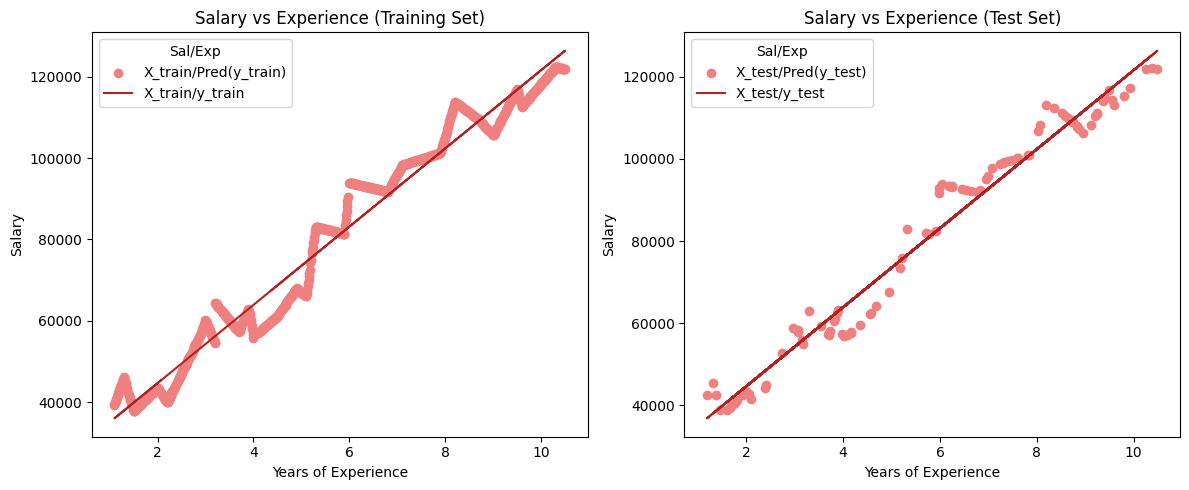

In [168]:
# Creating a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Prediction on training set
axs[0].scatter(X_train, y_train, color='lightcoral')
axs[0].plot(X_train, y_pred_train, color='firebrick')
axs[0].set_title('Salary vs Experience (Training Set)')
axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Salary')
axs[0].legend(['X_train/Pred(y_train)', 'X_train/y_train'], title='Sal/Exp', loc='best', facecolor='white')

# Prediction on test set
axs[1].scatter(X_test, y_test, color='lightcoral')
axs[1].plot(X_test, y_pred_test, color='firebrick')
axs[1].set_title('Salary vs Experience (Test Set)')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')
axs[1].legend(['X_test/Pred(y_test)', 'X_test/y_test'], title='Sal/Exp', loc='best', facecolor='white')

plt.tight_layout()
plt.show()

## Optimization Methods

To estimate the coefficients efficiently, optimization methods are used. Two common optimization algorithms are Gradient Descent and Normal Equations.

### Gradient Descent

Gradient Descent is an iterative optimization algorithm that updates the coefficients gradually by descending along the negative gradient of the cost function. The cost function is typically the RSS, and the algorithm seeks to minimize it. The steps of Gradient Descent include:

1. Initialize the coefficients randomly or with some initial guess.
2. Calculate the predicted values using the current coefficients.
3. Calculate the gradient of the cost function with respect to each coefficient.
4. Update the coefficients by taking a step proportional to the negative gradient.
5. Repeat steps 2-4 until convergence is reached.

## Model Evaluation
After fitting the linear regression model, it's important to evaluate its performance and assess its quality. Here are some commonly used evaluation metrics:

### Mean Squared Error (MSE)
MSE measures the average squared difference between the predicted and actual values. It is computed as:

$MSE = \frac{Σ(y - ŷ)^2}{n}$

Where `n` is the number of data points.

### R-squared ($R^2$)
R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. It is calculated as:

$R^2 = 1 - \frac{RSS}{TSS}$

Where RSS is the residual sum of squares and TSS is the total sum of squares.

The RSS (Residual Sum of Squares) represents the sum of squared differences between the observed dependent variable values (y) and the predicted values (ŷ) obtained from the linear regression model. Mathematically, it is calculated as follows:

$RSS = Σ(y - ŷ)^2$

On the other hand, the TSS (Total Sum of Squares) represents the total variation in the dependent variable (y) from its mean (ȳ). It measures the sum of squared differences between each observed dependent variable value (y) and the mean of the dependent variable (ȳ). Mathematically, it is calculated as follows:

$TSS = Σ(y - ȳ)^2$

In [169]:
   
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    root_mean_squared_error,
)

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test) 
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred_test)
 
print("MAE:", mae, "--- MSE:", mse, "--- RMSE:", rmse)


MAE: 3620.061596048149 --- MSE: 19779868.8994846 --- RMSE: 4447.456452792382


## Multiple Linear Regression

In multiple linear regression, we extend the concept of simple linear regression to include multiple independent variables. The equation for multiple linear regression can be expressed as:

$y = b + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$

Where:

- $y$ is the dependent variable
- $x_1, x_2, ..., x_n$ are the independent variables
- $b$ is the y-intercept
- $w_1, w_2, ..., w_n$ are the coefficients for each independent variable

The goal is to estimate the values of the coefficients that provide the best-fit hyperplane.

### Matrix Formulation

To solve multiple linear regression efficiently, we can express it in matrix form. Let's define:

- `Y` as a column vector of the dependent variable
- `X` as a matrix of independent variables
- `B` as a column vector of coefficients
- `E` as a column vector of residuals

The equation can be rewritten as:

$Y = X * B + E$

We aim to find the values of B that minimize the sum of squared residuals.

## Regularization

Regularization is a technique used to prevent overfitting and improve the generalization of the linear regression model. Two commonly used regularization methods are Ridge regression and Lasso regression.

### Ridge Regression
See *Logistic Regression* notebook for more

### Lasso Regression
See *Logistic Regression* notebook for more

## References

- [What Is Linear Regression? Types, Equation, Examples, and Best Practices](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/)
- [What is linear regression?](https://www.ibm.com/topics/linear-regression)